In [1]:
from math import isclose
import numpy as np
seed = 0
np.random.seed(seed) 
print(f"seed = {seed}")

seed = 0


In [2]:
import pathfinder as pf
from pathfinder import plot_results

In [3]:
N = 30
p = 0.5
rand_bool = np.triu(np.random.choice([True, False], size=(N,N), p=[p, 1-p]), 1)
dummy = rand_bool + rand_bool.T

<AxesSubplot:>

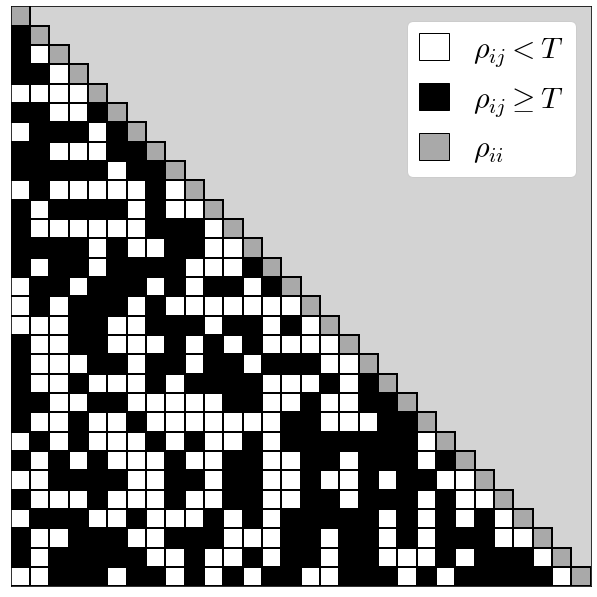

In [4]:
weights= np.sort(np.random.rand(len(dummy)))[::-1]
bam = pf.BinaryAcceptance(np.array(dummy, dtype=bool), weights=weights)
plot_results.plot(bam)

In [5]:
hdfs = pf.HDFS(bam, top=5)
hdfs.find_paths(verbose=True)

1: Path = [1, 2, 4, 11, 21],  Weight = 3.5699246364682686,
2: Path = [2, 3, 5, 9, 25],  Weight = 3.5377621749063666,
3: Path = [2, 3, 4, 7],  Weight = 3.4878943766987174,
4: Path = [0, 4, 6, 9],  Weight = 3.4407382576759846,
5: Path = [2, 3, 4, 9],  Weight = 3.434419904807475


In [6]:
whdfs = pf.WHDFS(bam, top=5)
whdfs.find_paths(verbose=True)

1: Path = [1, 2, 4, 11, 21],  Weight = 3.5699246364682686,
2: Path = [2, 3, 5, 9, 25],  Weight = 3.5377621749063666,
3: Path = [2, 3, 4, 7],  Weight = 3.4878943766987174,
4: Path = [0, 4, 6, 9],  Weight = 3.4407382576759846,
5: Path = [2, 3, 4, 9],  Weight = 3.434419904807475


In [7]:
print("WHDFS == HDFS")
print(f"Object comparison: {whdfs.res == hdfs.res}")
print(f"Weight comparison: {all([isclose(w.weight, h.weight) for w, h in zip(whdfs.res, hdfs.res)])} (fp tolerance 1e-9)")
print(f"Path comparison:   {all([w.path == h.path for w, h in zip(whdfs.res, hdfs.res)])}")

WHDFS == HDFS
Object comparison: True
Weight comparison: True (fp tolerance 1e-9)
Path comparison:   True


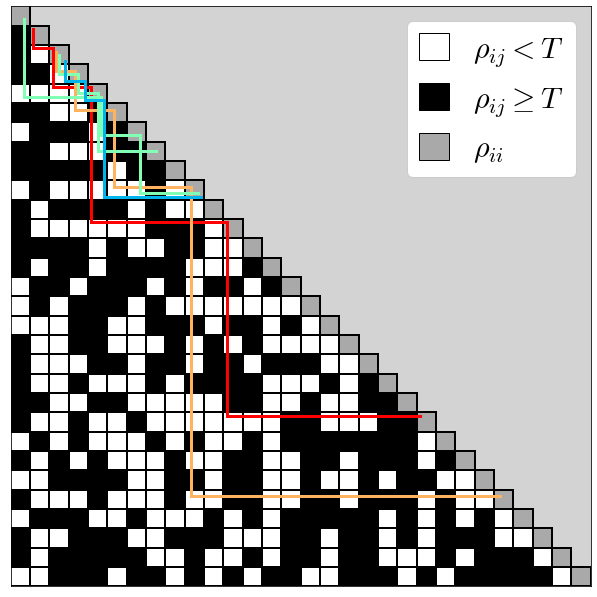

In [8]:
axis = plot_results.plot(bam, whdfs)